#import data

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

import random
import matplotlib.pyplot as plt

from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def get_scores(y_true, y_pred):
  rmse = mean_squared_error(y_true, y_pred)**0.5
  r2 = r2_score(y_true, y_pred)

  return rmse, r2

#Predicting total trips

## dataset

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/X_train.csv')
X_val = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/X_val.csv')
X_test = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/y_train.csv')
y_val = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/y_val.csv')
y_test = pd.read_csv('/content/drive/MyDrive/CIV1498 Final Project/Other/y_test.csv')

In [ ]:
#day, weekday, is_holiday, is_weekend not affect much. delete these features

header = ['Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'period_1',
       'period_2', 'period_3', 'period_4', 'period_5', 'Weather_Clear', 'Weather_Fog',
       'Weather_Precipitation']

X_train = X_train[header]
X_val = X_val[header]
X_test = X_test[header]
y_train = y_train['total trips']
y_val = y_val['total trips']
y_test = y_test['total trips']

In [ ]:
X_train

,Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Year_2017,Year_2018,Year_2019,Year_2020,...,Month_11,Month_12,period_1,period_2,period_3,period_4,period_5,Weather_Clear,Weather_Fog,Weather_Precipitation
0,-0.612299,0.438526,1.071607,-0.036403,0.385420,-1.604984,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,0.665812,0.031210,-1.300817,0.147168,0.385420,0.032721,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1.295215,0.577780,-1.355990,0.017589,0.385420,-1.241475,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,-0.488348,-0.484028,1.215056,0.989432,0.385420,-0.610117,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,-0.459901,-1.737310,1.369539,-0.284762,0.385420,1.808177,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,-1.032917,-0.692908,0.376431,2.371609,0.385420,0.930653,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
6278,-0.233844,-0.031454,0.685398,0.071580,0.385420,0.088204,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
6279,-0.713897,0.107799,0.795743,1.799301,0.385420,-2.036518,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
6280,0.506979,0.885298,0.707467,-1.242208,0.385420,-0.191337,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


##Linear Regression-Predicting with trip and weather data

In [ ]:
model = LinearRegression(fit_intercept= True)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

lr_train_rmse, lr_train_r2 = get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]
lr_val_rmse, lr_val_r2 = get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]

print('Training RMSE: {}\nTraining R2: {}'.format(get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]))
print('Validation RMSE: {}\nValidation R2: {}'.format(get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]))
print('Test RMSE: {}\nTest R2: {}'.format(get_scores(y_test_pred, y_test)[0], get_scores(y_test_pred, y_test)[1]))

Training RMSE: 799.6007174981096
Training R2: 0.4655111471004084
Validation RMSE: 815.8955215810162
Validation R2: 0.4328557389625458
Test RMSE: 774.7598400327907
Test R2: 0.47973568937402444


##KNN - Predicting with Weather and trip Data

In [ ]:
#select k
param_test1 = {'n_neighbors': range(1, 21)}
gsearch1 = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = param_test1, cv = 5)
gsearch1.fit(X_train, y_train)
k = gsearch1.best_params_['n_neighbors']

#get the maximum cross validation accuracy and corresponding k value
#best k = 9
print("Best k: ", k)


#train the actual model with the best parameters
model = KNeighborsRegressor(n_neighbors = k)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

knn_train_rmse, knn_train_r2 = get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]
knn_val_rmse, knn_val_r2 = get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]


print('Training RMSE: {}\nTraining R2: {}'.format(get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]))
print('Validation RMSE: {}\nValidation R2: {}'.format(get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]))
print('Test RMSE: {}\nTest R2: {}'.format(get_scores(y_test_pred, y_test)[0], get_scores(y_test_pred, y_test)[1]))

Best k:  9
Training RMSE: 572.3733858965343
Training R2: 0.7563036395934521
Validation RMSE: 655.6697091841954
Validation R2: 0.6647211242859523
Test RMSE: 666.3636448730679
Test R2: 0.6662871322094497


##Decision Tree - Predicting with trip and weather data

In [ ]:
#select maximum depth of a tree
param_test1 = {'max_depth': range(1, 30), 'min_samples_split': range(2, 20)}
gsearch1 = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 1), param_grid = param_test1, cv = 5)
gsearch1.fit(X_train, y_train)
d = gsearch1.best_params_['max_depth']

#select min_sample split and min_samples_leaf
param_test2 = {'min_samples_split': range(2, 20), 'min_samples_leaf': range(1,20)}
gsearch2 = GridSearchCV(estimator = DecisionTreeRegressor(max_depth = d, random_state = 0), param_grid = param_test2, cv = 5)
gsearch2.fit(X_train, y_train)
s = gsearch2.best_params_['min_samples_split']
l = gsearch2.best_params_['min_samples_leaf']

#print hyperparameter results
#best d = 10, best s = 2, best l = 13
print("Best tree depth: ", d)
print("Best min sample split: ", s)
print("Best min sample leaf: ", l)


#train the actual model with the optimum parameters
model = DecisionTreeRegressor(random_state = 0, max_depth = d, min_samples_split = s, min_samples_leaf = l)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

dt_train_rmse, dt_train_r2 = get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]
dt_val_rmse, dt_val_r2 = get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]


print('Training RMSE: {}\nTraining R2: {}'.format(get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]))
print('Validation RMSE: {}\nValidation R2: {}'.format(get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]))
print('Test RMSE: {}\nTest R2: {}'.format(get_scores(y_test_pred, y_test)[0], get_scores(y_test_pred, y_test)[1]))

Training RMSE: 584.3455005995949
Training R2: 0.7715142937319714
Validation RMSE: 659.4320598269253
Validation R2: 0.7199196025086083
Test RMSE: 621.052379640372
Test R2: 0.7504854605053873


##Random Forest - Predicting with weather and trip data

In [ ]:
#select the number of trees
param_test2 = {'n_estimators': range(1, 51)}
gsearch2 = GridSearchCV(estimator = RandomForestRegressor(max_depth = 10, random_state = 0, min_samples_leaf = 1, min_samples_split = 2), param_grid = param_test2, cv = 5)
gsearch2.fit(X_train, y_train)
n = gsearch2.best_params_['n_estimators']
print("Best number of trees: ", n)

In [ ]:
#select maximum depth of a tree
param_test2 = {'max_depth': range(1, 21)}
gsearch2 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = n, random_state = 0, min_samples_leaf = 1, min_samples_split = 2), param_grid = param_test2, cv = 5)
gsearch2.fit(X_train, y_train)
d = gsearch2.best_params_['max_depth']
print("Best tree depth: ", d)

In [ ]:
#select min_sample split
param_test3 = {'min_samples_split': range(2, 11)}
gsearch3 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = n, max_depth = d, random_state = 0, min_samples_leaf = 1), param_grid = param_test3, cv = 5)
gsearch3.fit(X_train, y_train)
s = gsearch3.best_params_['min_samples_split']
print("Best min sample split: ", s)

In [ ]:
#select min_samples_leaf
param_test4 = {'min_samples_leaf': range(1,11)}
gsearch4 = GridSearchCV(estimator = RandomForestRegressor(n_estimators = n, max_depth = d, random_state = 0, min_samples_split = s), param_grid = param_test4, cv = 5)
gsearch4.fit(X_train, y_train)
l = gsearch4.best_params_['min_samples_leaf']
print("Best min sample leaf: ", l)

In [ ]:
n = 41
d = 17
s = 2
l = 2

#train the model with the optimum hyper-parameters 41, 17, 2, 2
model = RandomForestRegressor(random_state = 0, n_estimators = n, max_depth = d, min_samples_split = s, min_samples_leaf = l)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

rf_train_rmse, rf_train_r2 = get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]
rf_val_rmse, rf_val_r2 = get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]

print('Training RMSE: {}\nTraining R2: {}'.format(get_scores(y_train_pred, y_train)[0], get_scores(y_train_pred, y_train)[1]))
print('Validation RMSE: {}\nValidation R2: {}'.format(get_scores(y_val_pred, y_val)[0], get_scores(y_val_pred, y_val)[1]))
print('Test RMSE: {}\nTest R2: {}'.format(get_scores(y_test_pred, y_test)[0], get_scores(y_test_pred, y_test)[1]))

Training RMSE: 284.38156686562166
Training R2: 0.9501013208602809
Validation RMSE: 593.8445088975801
Validation R2: 0.7737755037019279
Test RMSE: 558.0206055010553
Test R2: 0.7995021238360207


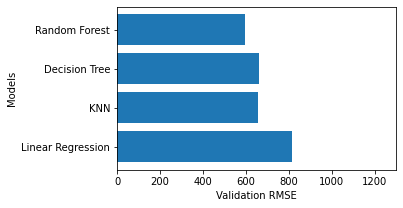

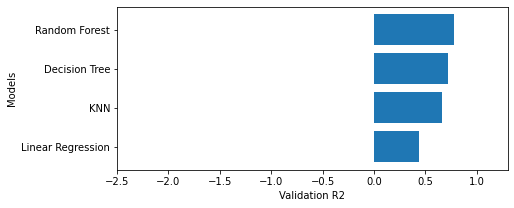

In [ ]:
import matplotlib.pyplot as plt
   
models = ['Linear Regression','KNN','Decision Tree','Random Forest']
rmse_train = [lr_train_rmse, knn_train_rmse, dt_train_rmse, rf_train_rmse]
rmse_val = [lr_val_rmse, knn_val_rmse, dt_val_rmse, rf_val_rmse]
r2_train = [lr_train_r2, knn_train_r2, dt_train_r2, rf_train_r2]
r2_val = [lr_val_r2, knn_val_r2, dt_val_r2, rf_val_r2]

plt.figure(figsize = (5, 3))
plt.barh(models,rmse_val)
plt.ylabel('Models')
plt.xlabel('Validation RMSE')
plt.xlim(0, 1300)
plt.show()

plt.figure(figsize = (7, 3))
plt.barh(models,r2_val)
plt.ylabel('Models')
plt.xlabel('Validation R2')
plt.xlim(-2.5, 1.3)
plt.show()